In [1]:
# Purpose: 
# 1. Catch any outliers
# 2. Visualize possible relationships for feature engineering
import os
os.getcwd()
os.chdir('..')

In [2]:
# Specify libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Read in raw data
df = pd.read_csv('data/data_raw.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First, take a look at our dependent variable: SalePrice

In [4]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

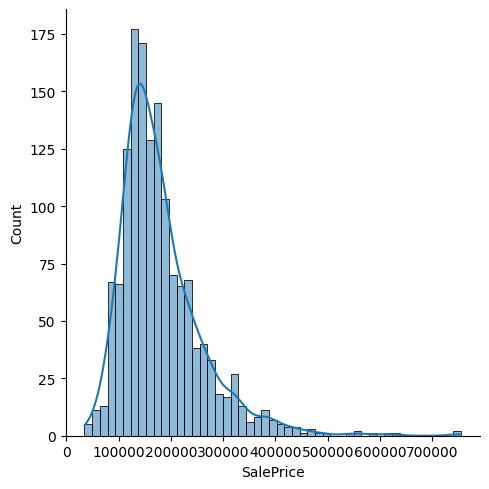

In [5]:
sns.displot(df.SalePrice, kde = True)

# Right skewed
# Not normal distribution


In [6]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Multivariate analyses: Let's take a look at how SalesPrice trends with:
- Numerical: 'GrLivArea', 'TotalBsmtSF'
- Categorical: 'OverallQual' , 'YearBuilt'

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

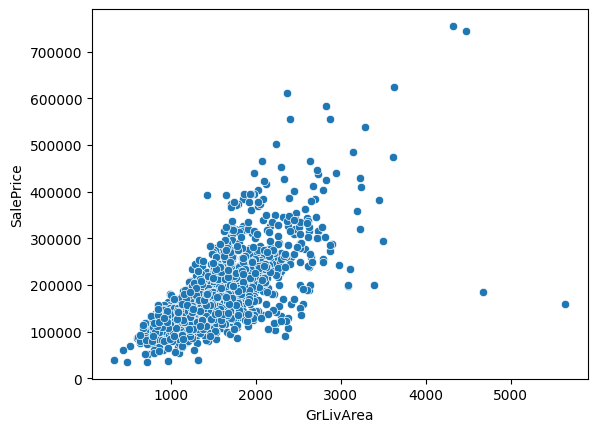

In [7]:
#scatter plot grlivarea/saleprice
ind_var = 'GrLivArea'
dep_var = 'SalePrice'
sns.scatterplot(df, x = ind_var, y = dep_var)

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

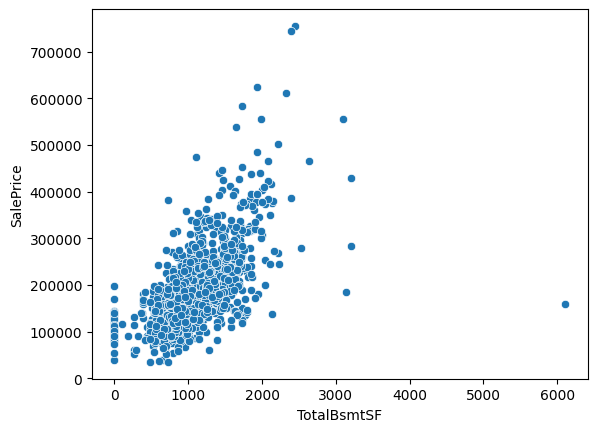

In [8]:
#scatter plot totalbsmtsf/saleprice
ind_var = 'TotalBsmtSF'
dep_var = 'SalePrice'
sns.scatterplot(df, x = ind_var, y = dep_var)

(-0.5, 9.5, 0.0, 800000.0)

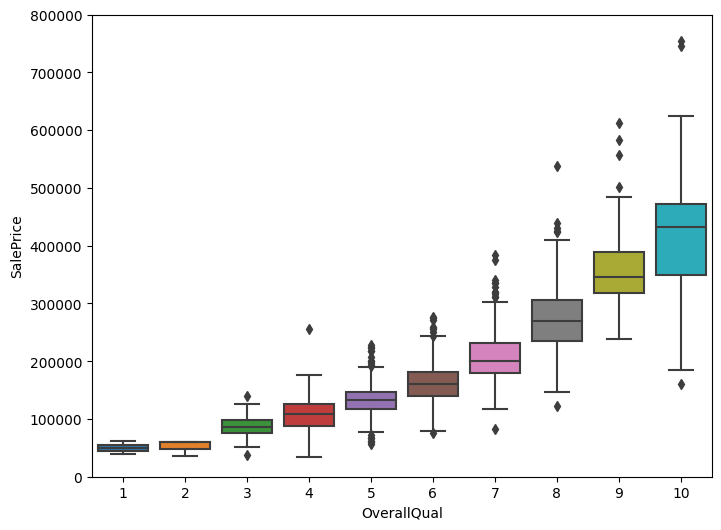

In [9]:
#box plot overallqual/saleprice
ind_var = 'OverallQual'
dep_var = 'SalePrice'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=ind_var, y=dep_var, data=df)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

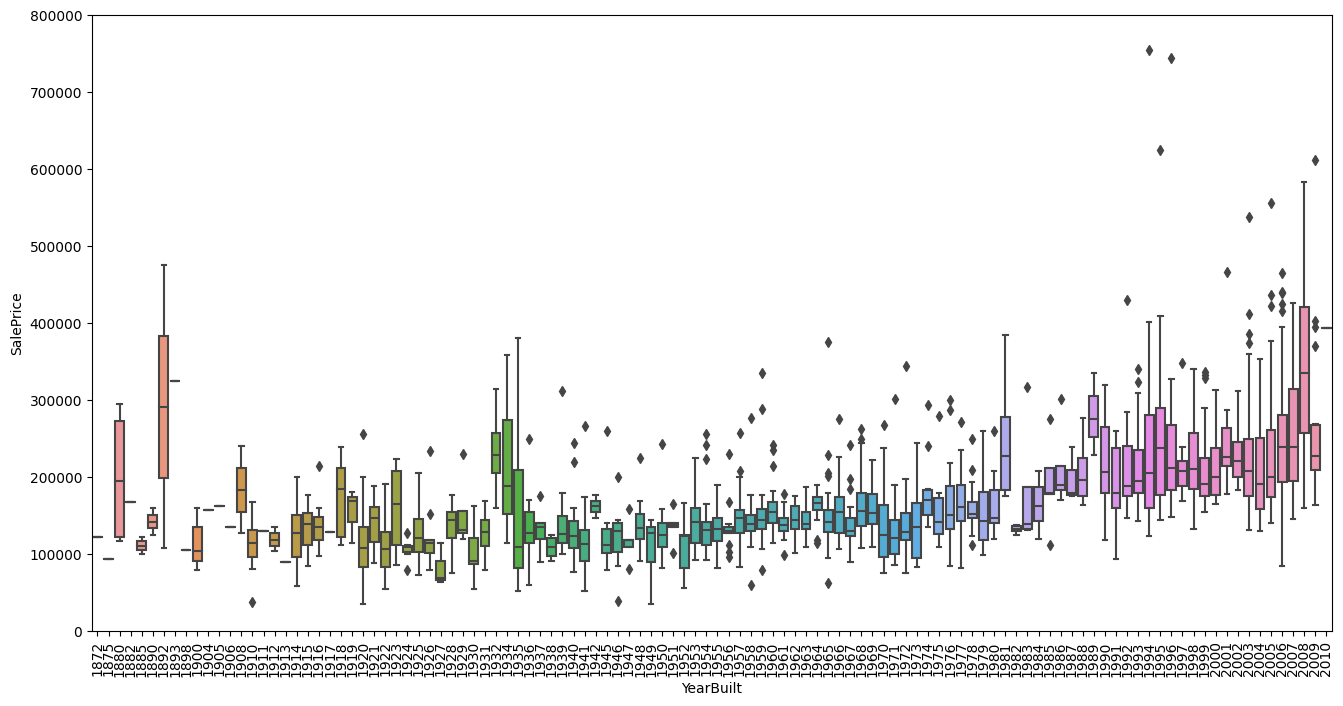

In [10]:
#box plot overallqual/saleprice
ind_var = 'YearBuilt'
dep_var = 'SalePrice'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=ind_var, y=dep_var, data=df)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation = 90)

<AxesSubplot: xlabel='YearBuilt'>

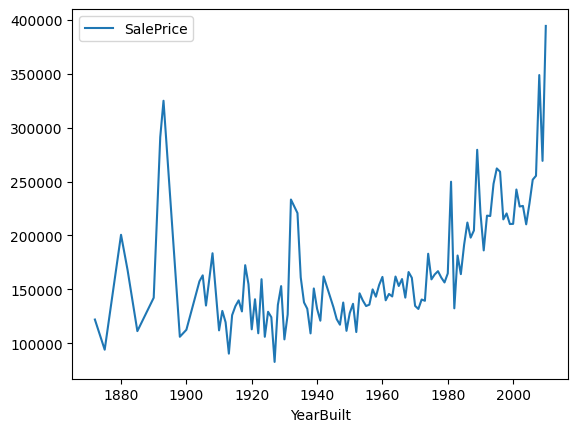

In [11]:
# Zoom in on YearBuilt against mean of SalePrice
SalePriceMean_YearBuilt = df.groupby('YearBuilt').agg({'SalePrice':'mean'})
sns.lineplot(SalePriceMean_YearBuilt)
# Specific old builds are valuable, but otherwise, the trend follows that newer => higher sale price

Correlation Matrix

C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\3766558127.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<AxesSubplot: >

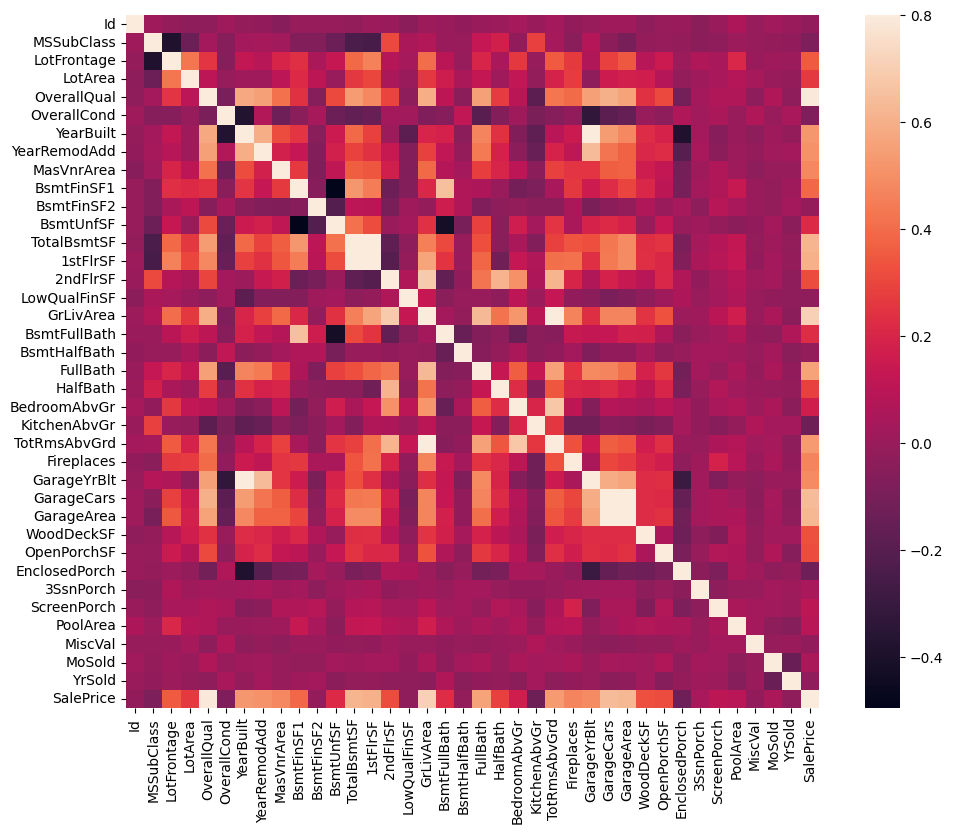

In [12]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

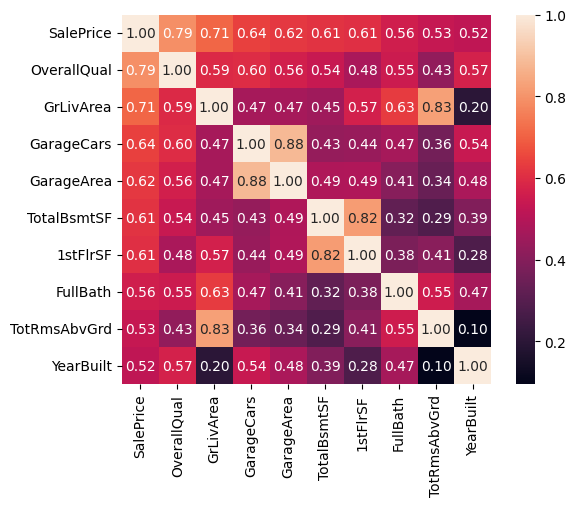

In [13]:
# Zoomed Heatmap
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

c:\Users\Bing En\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


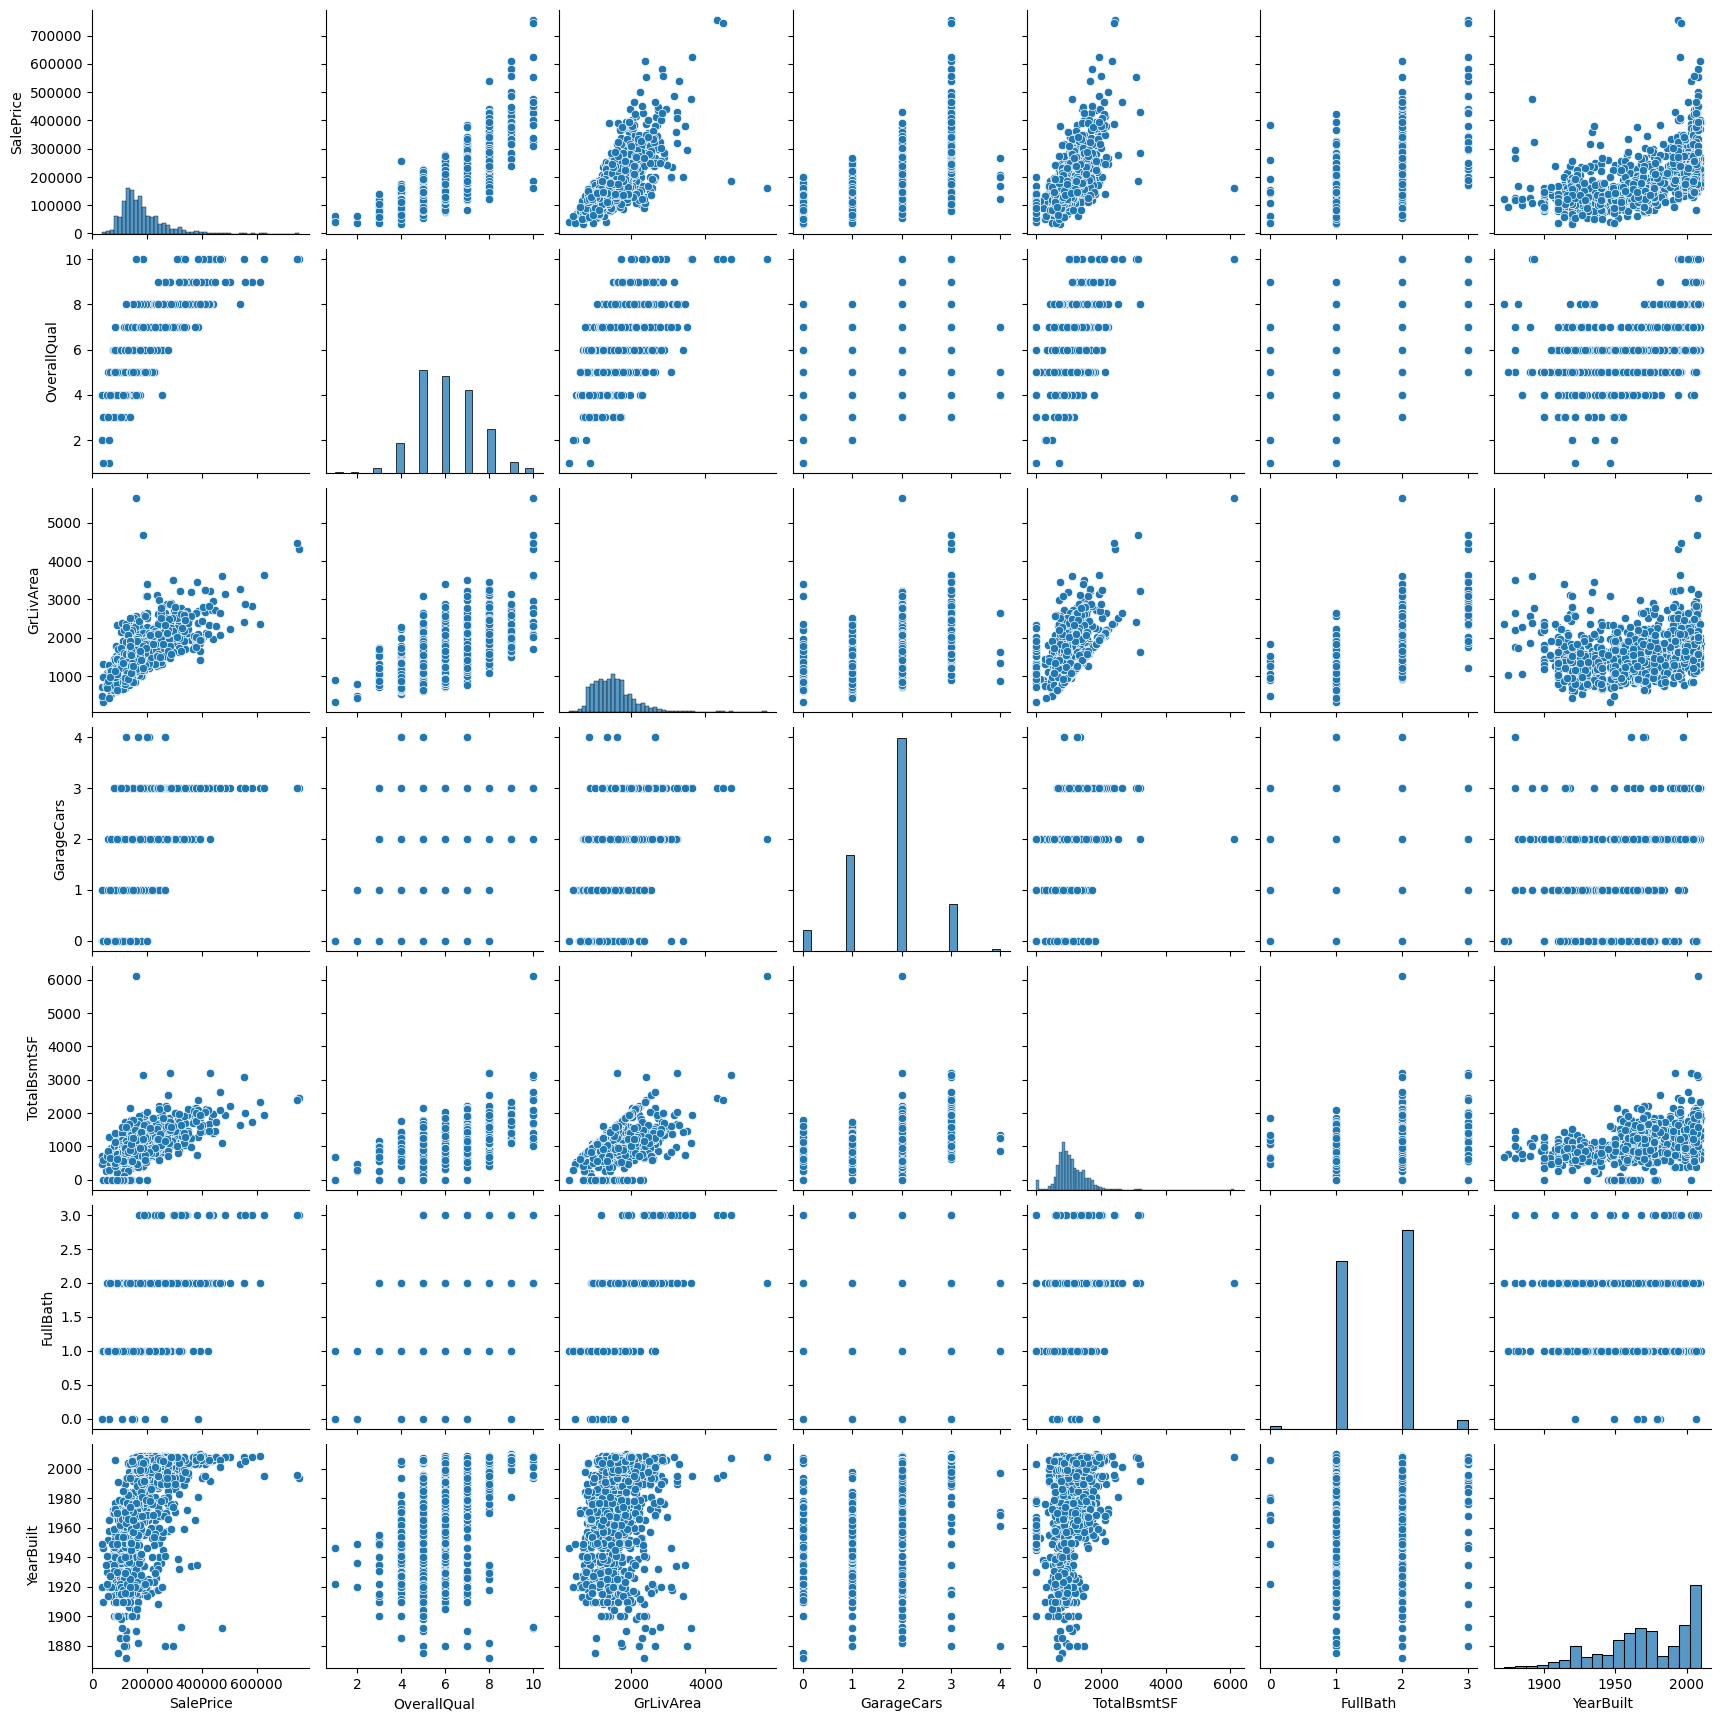

In [14]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

Outliers

From code below: 
- Low range values are similar and not too far from 0.
- High range values are far from 0 and the 7. Some of the rows are out of range (outliers!)

In [15]:
from sklearn.preprocessing import StandardScaler
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\2848268764.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis])


Remove Missing Data and Outliers


In [16]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [17]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\2227668749.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

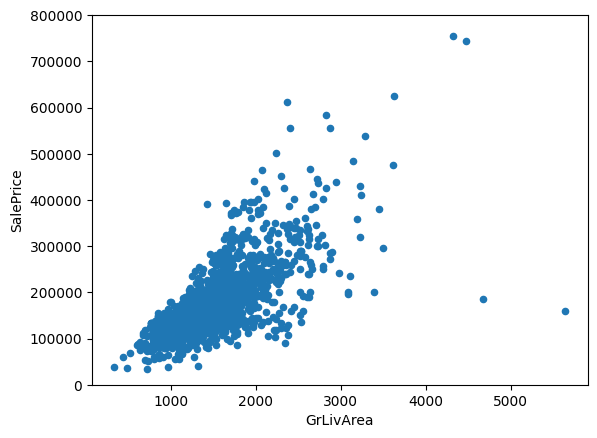

In [18]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
# Notice the two dots at the bottom right of the graph and the top right of the graph

In [19]:
#deleting points
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

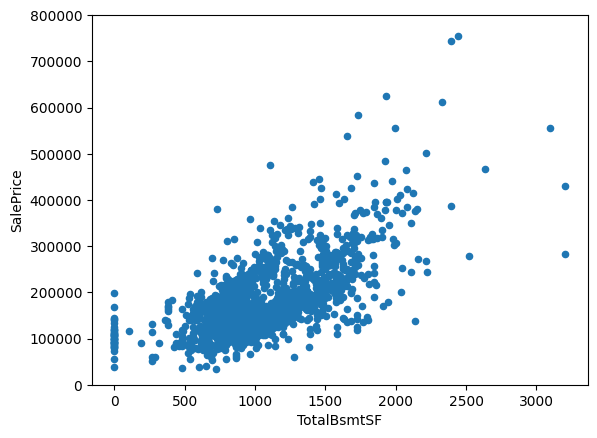

In [20]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Normality Checks

C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\2702259970.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=stats.norm)


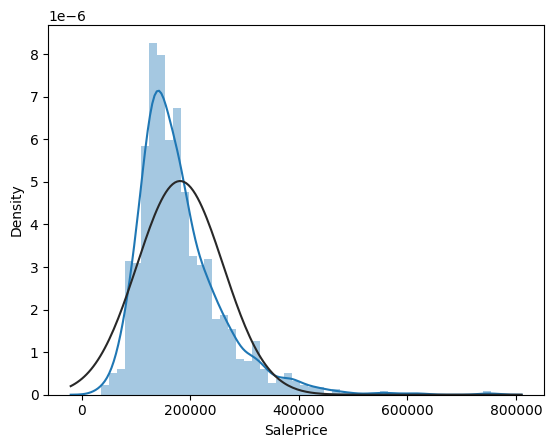

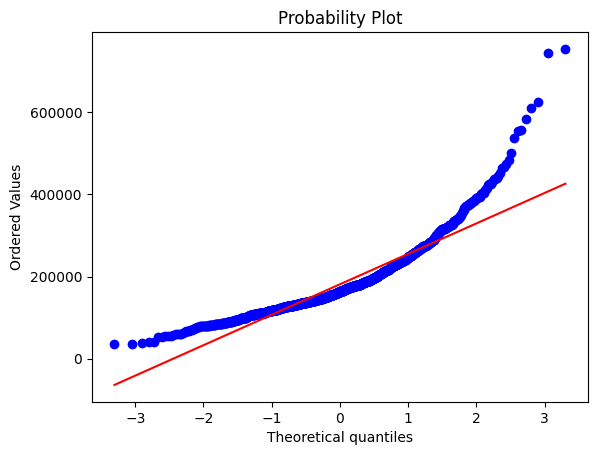

In [21]:
# SalePrice
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\1233844075.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GrLivArea'], fit=stats.norm)


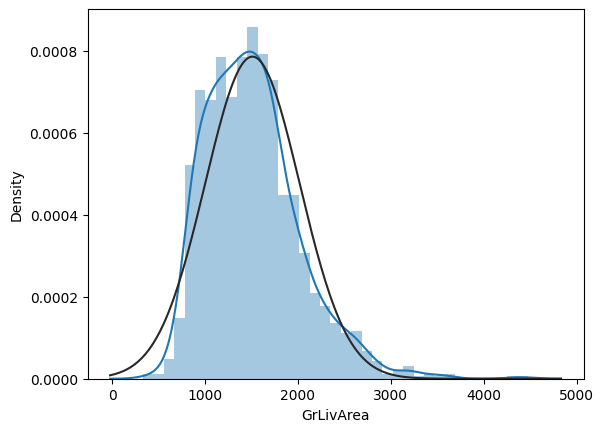

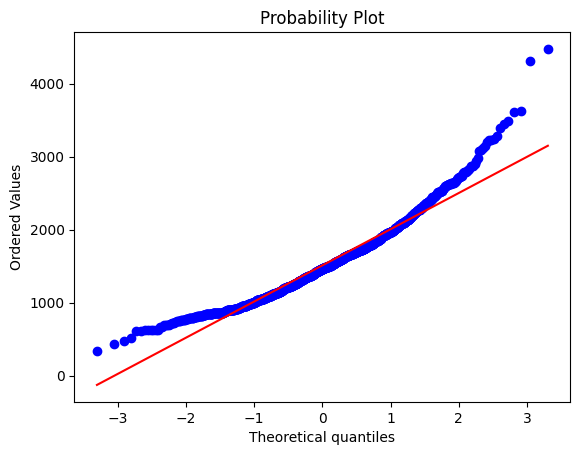

In [22]:
# GrLivArea
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\179859771.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GrLivArea'], fit=stats.norm)


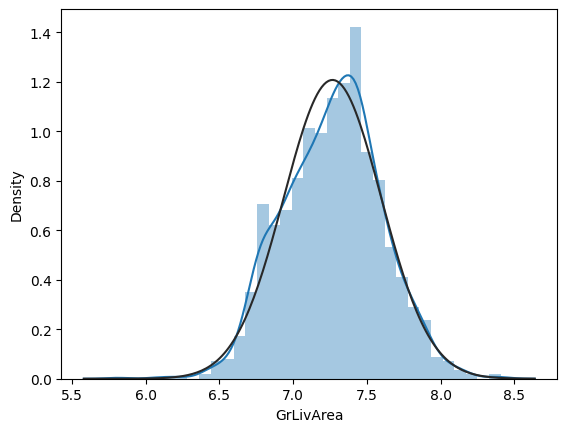

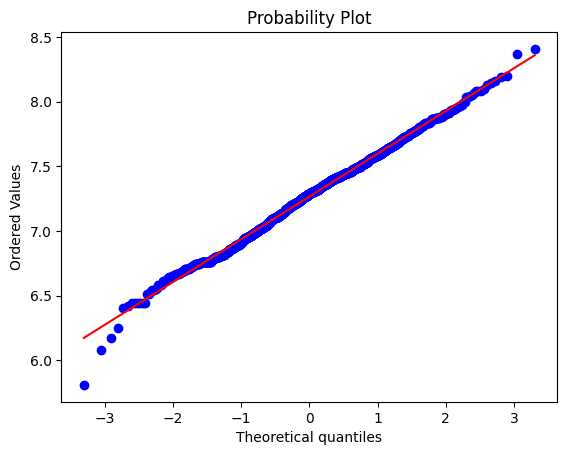

In [23]:
# Apply log transform/ Box-Cox to variable
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\4179625811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalBsmtSF'], fit=stats.norm);


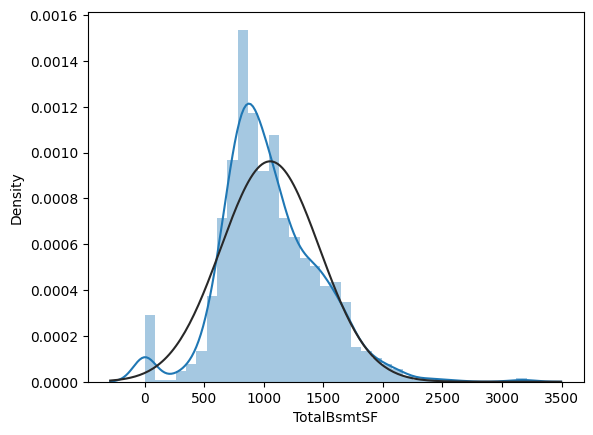

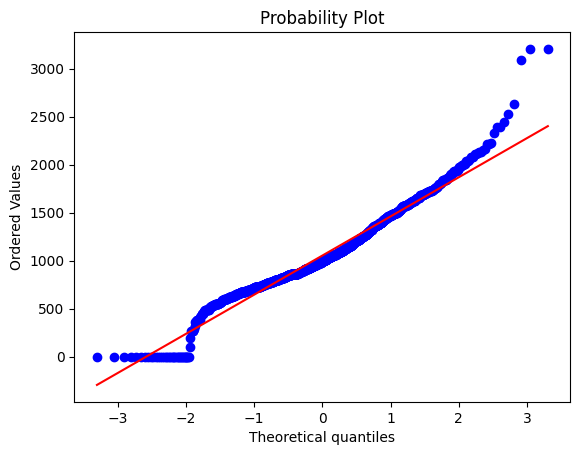

In [24]:
# TotalBsmtSF
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [25]:
# Lots of 0s, indicating properties w/o a basement
# Create a HasBsmt feature where 1 indicates the presence of a basement, 0 otherwise
# create column for new variable (one is enough because it's a binary categorical feature)
# if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

c:\Users\Bing En\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gbe19_6azx2mp\AppData\Local\Temp\ipykernel_9248\1837473110.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=stats.norm)


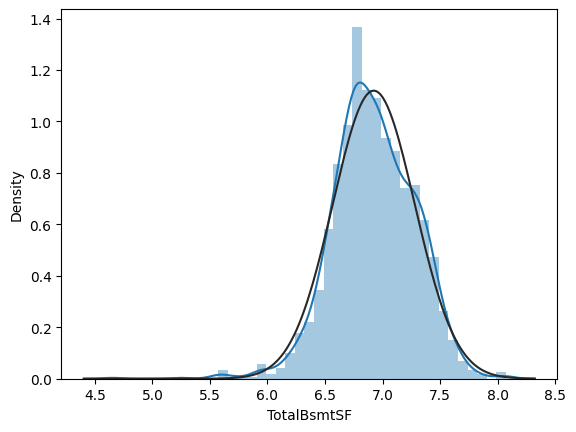

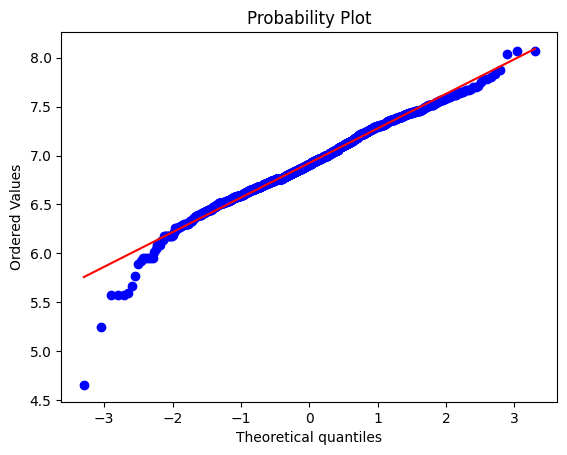

In [26]:
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

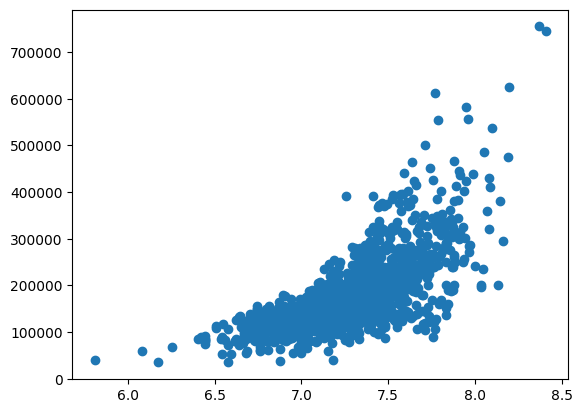

In [27]:
# Now look at scatter plots
plt.scatter(df['GrLivArea'], df['SalePrice'])

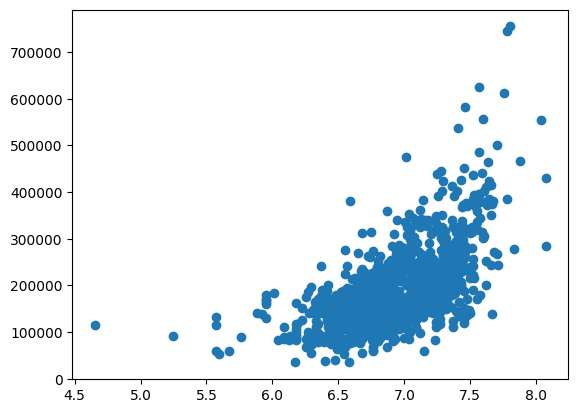

In [28]:
#scatter plot
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], df[df['TotalBsmtSF']>0]['SalePrice'])